In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Import raw cycling Data

In [2]:
trips_raw = pd.read_csv('trips_raw_data.csv')

C:\Users\aliqm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Explore data types and rows in trips_raw_data.csv

In [3]:
trips_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039088 entries, 0 to 8039087
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   Trip Id              int64  
 2   Subscription Id      float64
 3   Trip Duration        int64  
 4   Start Station Id     float64
 5   Start Time           object 
 6   Start Station Name   object 
 7   End Station Id       float64
 8   End Time             object 
 9   End Station Name     object 
 10  Bike Id              float64
 11  User Type            object 
 12  merge_time           object 
 13  Date/Time            object 
 14  Temp (°C)            float64
 15  Dew Point Temp (°C)  float64
 16  Rel Hum (%)          float64
 17  Wind Dir (10s deg)   float64
 18  Wind Spd (km/h)      float64
 19  Visibility (km)      float64
 20  Stn Press (kPa)      float64
 21  Hmdx                 float64
 22  Wind Chill           float64
 23  Weather              object 
dty

In [4]:
trips_raw.head()

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,58,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,59,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
2,60,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St W / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
3,61,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
4,62,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St/Queens Quay(Billy Bishop Airport),7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN


# Cleaning Data

Removing all row except Trip ID, Trip Duration, Start Time and User Type

In [5]:
trips_raw = trips_raw[['Trip Id', 'Trip Duration', 'Start Time', 'User Type']]

Converting Start Time Column to a datetime format

In [6]:
trips_raw ['Start Time'] = pd.DatetimeIndex(trips_raw ['Start Time'])

Analyzing how many different user types there are 

In [7]:
unique_subscriptions = trips_raw['User Type'].unique()
unique_subscriptions

array([nan, 'Annual Member', 'Casual Member'], dtype=object)

Removing all nan from the User Type columns

In [8]:
trips_raw = trips_raw[~trips_raw['User Type'].isna()]

Determinging the time range for the data

In [9]:
min_date = trips_raw['Start Time'].min()
max_date = trips_raw['Start Time'].max()
print(min_date)
print(max_date)

2018-01-01 00:47:00-05:00
2020-12-10 23:59:00-05:00


Looks like before 2018-01-01, user types were not tracked. Also, last 21 days of December 2020 are missing from the data set. Free ride Wednesdays are only during September. Only keep data from September of each year

In [37]:
trips_raw = trips_raw[trips_raw['Start Time'].dt.month==9]

Split data set into casual and annual users

In [38]:
casual_user = trips_raw[trips_raw['User Type'] == 'Casual Member']
annual_user = trips_raw[trips_raw['User Type'] == 'Annual Member']

Grouping data by weekday

In [39]:
casual_user['Day'] = casual_user['Start Time'].dt.weekday
annual_user['Day'] = annual_user['Start Time'].dt.weekday

<ipython-input-39-073088605e40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_user['Day'] = casual_user['Start Time'].dt.weekday
<ipython-input-39-073088605e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_user['Day'] = annual_user['Start Time'].dt.weekday


In [40]:
number_casual_users = casual_user.groupby(['Day']).size()
number_annual_users = annual_user.groupby(['Day']).size()

In [41]:
number_casual_users

Day
0    22686
1    22984
2    30673
3    16672
4    20553
5    39457
6    43379
dtype: int64

In [42]:
number_annual_users

Day
0     95490
1    103538
2     99884
3     94461
4     87750
5     76382
6     84575
dtype: int64

# Plotting Data

<ipython-input-48-b34fd94abbb1>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(number_casual_users.index)


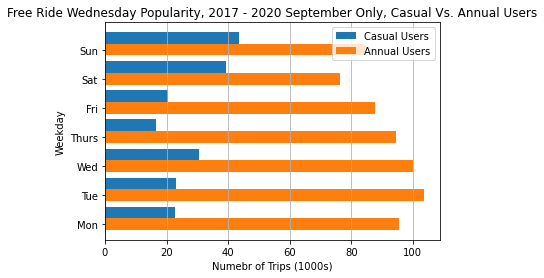

In [48]:
fig, ax = plt.subplots()

p1 = ax.barh(np.arange(7)+0.4, number_casual_users/1000, 0.4, align = 'center')
p2 = ax.barh(np.arange(7), number_annual_users/1000, 0.4, align = 'center')

ax.set_yticklabels(number_casual_users.index)

ax.set_yticks(np.arange(7)+0.4/2)

ax.xaxis.grid(True)
ax.yaxis.grid(False)

Weekdays = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

plt.yticks(range(7), Weekdays)

ax.set_xlabel('Numebr of Trips (1000s)')
ax.set_ylabel('Weekday')
ax.set_title('Free Ride Wednesday Popularity, 2017 - 2020 September Only, Casual Vs. Annual Users')

ax.legend((p1[0], p2[0]), ('Casual Users', 'Annual Users'), 
          loc='best')

There is a spike on free ride wednesday. However, the weekends are still more popular for casual users. Annual users are most likey using the bike share for their commutes, rather than for leasure (like the casual users). 